<center><h2>Machine Learning Project Task: Indoor Localization Using WLAN Fingerprinting</h2></center>

### Project Overview:

* This project targets the challenging domain of indoor localization through the lens of the UJIIndoorLoc dataset, which encompasses WLAN fingerprinting data from three different buildings at Universitat Jaume I. With over 19,000 training instances and 1,111 validation instances detailing WiFi fingerprints, geographic coordinates, and further relevant information, your task is to develop predictive models that not only excel in accuracy but also in their applied nature for real-world localization scenarios.


##### Students Names:
- Ayah Nassar - 60101805
- Sumaya Al-Hamdan - 60105006

## Deep Dataset Understanding:
- Start by delving deep into the UJIIndoorLoc dataset, grasping the intricacies of its attributes, structure, and the overarching indoor localization challenge it poses. This foundational understanding is critical for aligning your technical efforts with the real-world application of indoor positioning systems.

## Robust Data Preprocessing:
- Undertake thorough preprocessing activities, ensuring the dataset is primed for accurate modeling. This includes addressing missing values, normalizing feature scales, and encoding categorical variables. The quality of these preprocessing steps is directly correlated to the reliability and applicability of your models in actual localization tasks.

In [1]:
# import nessecary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#deep learning libs
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate


%matplotlib inline

In [127]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2
from sklearn.pipeline import make_pipeline


In [128]:
# pip install tensorflow

## 1. Data Understanding and Cleaning:

##### 1.1 Load & Explore the dataset

In [3]:
# load the dataset and display the first 5 rows
traindf = pd.read_csv("trainingData.csv")
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [5]:
traindf.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [6]:
traindf.isnull().sum()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64

* As confirmed above, there is no missing values in our training dataset, but signal strengths of 100s are effectively placeholders for "no signal". We need to decide how to handle these, possibly by keeping them as-is or transforming them for the modeling process.

In [7]:
# Handle the 100s in WAPs: convert 100s to -100  - help from GPT as we cannot drop them or impute them with median/mean
traindf[traindf.columns[:520]] = traindf[traindf.columns[:520]].replace(100, -100)


In [8]:
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-100,-100,-100,-100,-100,-100,-100,-97,-100,-100,...,-100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


### Explanation
- In this dataset, no-signal values from Wireless Access Points (WAPs) are represented as 100, which does not align with the typical Received Signal Strength Indicator (RSSI) range used in wireless signal processing. To ensure numerical consistency and maintain a realistic representation of signal strengths, we convert these no-signal values to -100 dBm. This conversion reflects the lower end of the RSSI range, distinguishing between very weak signals and the absence of a signal, and facilitating the application of machine learning models by keeping the data within a realistic and uniform scale. This step is crucial for accurate indoor localization as it allows the models to interpret and learn from the absence of a signal in a meaningful way.


##### 1.2 Remove Unnecessary Features:

* We'll remove features that may not contribute to the localization accuracy, such as TIMESTAMP, USERID, and PHONEID, assuming they are not relevant for our prediction model.

In [9]:
traindf = traindf.drop(columns=['TIMESTAMP', 'USERID', 'PHONEID'])
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-7541.2643,4.864921e+06,2,1,106,2
1,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-7536.6212,4.864934e+06,2,1,106,2
2,-100,-100,-100,-100,-100,-100,-100,-97,-100,-100,...,-100,-100,-100,-100,-7519.1524,4.864950e+06,2,1,103,2
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-7524.5704,4.864934e+06,2,1,102,2
4,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-7632.1436,4.864982e+06,0,0,122,2


#### Understanding the columns

##### 1. SPACEID
- Definition: Typically represents a specific location or area within a building, such as a room or an office space.
- Categorical Nature: Since it labels distinct spaces with unique identifiers, it is categorical. Each unique identifier (or label) represents a different category (i.e., a different space).
- Model Treatment: For tasks like indoor localization where the goal might be to predict the exact location, SPACEID could serve as a target variable for classification models. If used as an input feature, it should be treated with care to ensure it doesn't introduce data leakage or bias the model, especially if the SPACEID directly or indirectly reveals the target variable (like the floor or part of a building).

##### RELATIVEPOSITION
- Definition: This variable typically indicates a finer classification within a space, such as whether the measurement was taken near the door, center, or any other relative position within a given SPACEID.
- Categorical Nature: It represents distinct categories within spaces, making it a categorical variable.
- Model Treatment: As an input feature, it provides additional spatial context that could improve the model's localization accuracy. Encoding it properly (e.g., via one-hot encoding or label encoding) allows machine learning models to utilize this information effectively.

##### The categorical variables include:

- BUILDINGID: Represents the ID of the building where the signal strength measurements were taken. This is a categorical variable as it represents distinct groups (buildings) within the dataset.
- FLOOR: Represents the floor level within the building. Although it might seem numerical, it functions as a categorical variable in the context of indoor localization because each floor represents a distinct category or level within a building.

##### 1.3 Normalize Feature Scales: (on numerical columns but not categorical or unique identifiers)

In [10]:
# Help from gpt

# Shift signal strength values to positive range
traindf.iloc[:, :520] = traindf.iloc[:, :520].add(100)

# Scale to 0-1 range
traindf.iloc[:, :520] = traindf.iloc[:, :520].div(200)


- This code above will adjust the DataFrame traindf in place, first by adding 100 to each of the first 520 columns (which we assume are the WAP features), and then dividing those values by 200 to normalize them to a range between 0 and 1. The .add(100) and .div(200) methods operate on the DataFrame in place, effectively updating the signal strength values.

In [11]:
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,-7541.2643,4.864921e+06,2,1,106,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,-7536.6212,4.864934e+06,2,1,106,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.0,0.0,0.0,0.0,-7519.1524,4.864950e+06,2,1,103,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,-7524.5704,4.864934e+06,2,1,102,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,-7632.1436,4.864982e+06,0,0,122,2


- I asked GPT if i should impute these zeros and it told me that in the context of indoor localization using WLAN fingerprinting, zeros resulting from normalization where the original value represented 'no signal' are meaningful. They carry important information that indicates the absence of a signal from that particular WAP at that specific location. Therefore, it's generally not advisable to impute these zeros with median, mean, or any other statistic because doing so would introduce a bias in our data, suggesting signal where there was none.

In [12]:
# Help from GPT - normalization
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the longitude and latitude columns 
long_lat = traindf[['LONGITUDE', 'LATITUDE']] 

# Fit the scaler to the long_lat data and transform it
traindf[['LONGITUDE', 'LATITUDE']] = scaler.fit_transform(long_lat)


In [13]:
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.384294,0.646015,2,1,106,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.396183,0.695646,2,1,106,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.0,0.0,0.0,0.0,0.440915,0.752141,2,1,103,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.427042,0.695158,2,1,102,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.151580,0.872775,0,0,122,2


- Normalizing longitude and latitude can improve model performance by ensuring these features contribute equally to the prediction alongside other normalized features.

#### 1.3 Encode categorical variables:


In [15]:
# Convert BUILDINGID, FLOOR, and SPACEID to strings and concatenate them to form a unique location identifier
traindf['UNIQUELOCATION'] = (
    traindf['BUILDINGID'].astype(str) + 
    '_' + 
    traindf['FLOOR'].astype(str) + 
    '_' + 
    traindf['SPACEID'].astype(str)
)

C:\Users\sumay\AppData\Local\Temp\ipykernel_16220\3482892655.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  traindf['UNIQUELOCATION'] = (


In [16]:
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.384294,0.646015,2,1,106,2,1_2_106
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.396183,0.695646,2,1,106,2,1_2_106
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.0,0.0,0.0,0.440915,0.752141,2,1,103,2,1_2_103
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.427042,0.695158,2,1,102,2,1_2_102
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.151580,0.872775,0,0,122,2,0_0_122


In [17]:
# now scale using one hot encoding
labelencoder = LabelEncoder()
traindf['UNIQUELOCATION'] = labelencoder.fit_transform(traindf['UNIQUELOCATION'])
traindf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.384294,0.646015,2,1,106,2,349
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.396183,0.695646,2,1,106,2,349
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.0,0.0,0.0,0.440915,0.752141,2,1,103,2,346
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.427042,0.695158,2,1,102,2,345
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.151580,0.872775,0,0,122,2,15


In [18]:
traindf['non_zero_signal_count'] = (traindf.iloc[:, :520] != 0).sum(axis=1)
traindf.head()

C:\Users\sumay\AppData\Local\Temp\ipykernel_16220\4132673236.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  traindf['non_zero_signal_count'] = (traindf.iloc[:, :520] != 0).sum(axis=1)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION,non_zero_signal_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.384294,0.646015,2,1,106,2,349,17
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.396183,0.695646,2,1,106,2,349,16
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015,0.0,0.0,...,0.0,0.0,0.440915,0.752141,2,1,103,2,346,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.427042,0.695158,2,1,102,2,345,16
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.151580,0.872775,0,0,122,2,15,0


- This line of code above creates a new column in our DataFrame called non_zero_signal_count that contains the count of non-zero signal strengths for each observation (row). The (traindf.iloc[:, :520] != 0) portion creates a boolean DataFrame where True represents a non-zero signal strength, and .sum(axis=1) counts the number of True values for each row.

- As per GPT, Adding this feature at this stage of the project, during feature engineering, is appropriate. It's a form of dimensionality reduction that consolidates information across many features into a single one, which can be especially useful before we move on to model training and validation.

In [19]:
# To check if there is a need of resampling, shows the number of times a particular space ID appears in the dataset. 
# # For instance, SPACEID 202 appears 484 times, while SPACEID 106 appears 475 times, and so on.
class_distribution = traindf['SPACEID'].value_counts()
print(class_distribution)


SPACEID
202    484
106    475
107    469
104    439
102    418
      ... 
11      17
14      12
142     10
254     10
22      10
Name: count, Length: 123, dtype: int64


- The above output indicates that the class distribution is imbalanced — some locations are overrepresented with many observations, while others have very few.
- An imbalanced dataset can lead to a model that is biased towards the more frequent classes. It may perform well on those but poorly on less frequent ones because it has not had enough data to learn from those cases effectively.

- We will choose whether to resample or not depending on the model chosen.

### Visualize the data to see the flow

C:\Users\sumay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


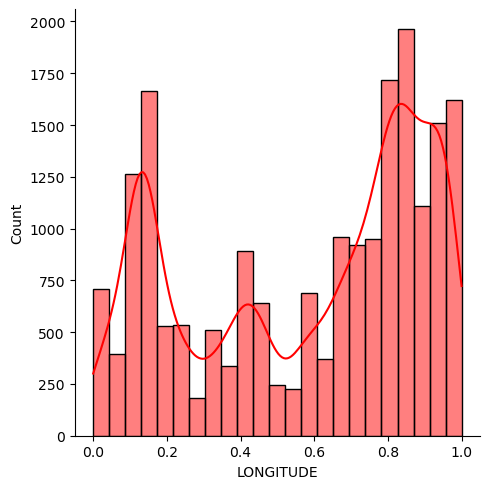

In [20]:
# find the distribution of values in the Longtitude column - FEATURE COLUMN
sns.displot(data = traindf, x = 'LONGITUDE', color='red', kde=True)

- This distribution plot visualizes the spread of values in the Longitude column. The histogram shows the frequency of different longitude values, and the KDE (Kernel Density Estimate) curve provides a smoothed representation of the data distribution. Understanding the distribution of longitudes is crucial for assessing the range and variability of this feature within the dataset.

C:\Users\sumay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


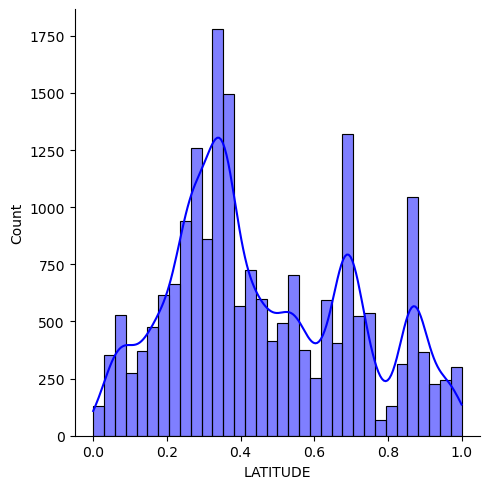

In [21]:
# find the distribution of values in the latitude column - FEATURE COLUMN
sns.displot(data = traindf, x = 'LATITUDE', color='blue', kde=True)

- Similarly, this distribution plot illustrates the spread of values in the Latitude column. The histogram and KDE curve present the frequency and density of different latitude values, offering insights into the range and patterns associated with this feature within the dataset.

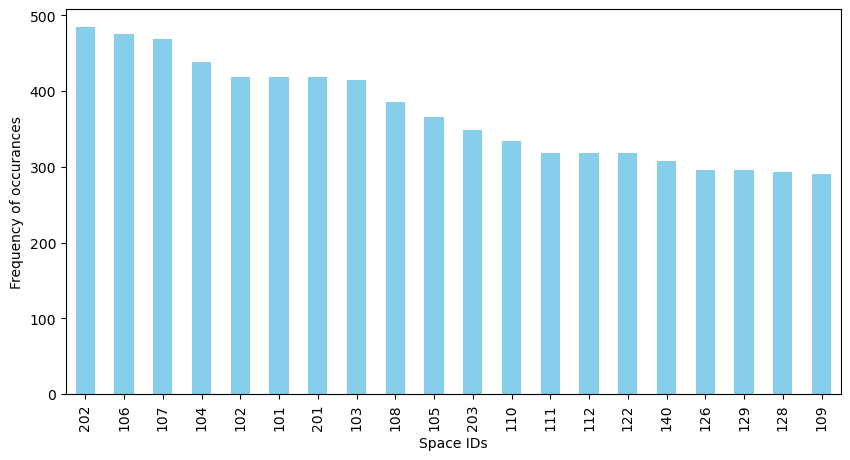

In [22]:
# find the distribution of values in the SPACEID column - TARGET COLUMN
traindf['SPACEID'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel('Space IDs')
plt.ylabel('Frequency of occurances')
plt.show()

- This bar plot illustrates the top 20 most frequent Space IDs within the dataset. Each bar corresponds to a specific space or room, and the height of the bars indicates the frequency of occurrences. Examining the top values allows us to gain insights into the most commonly observed spaces, aiding in understanding the dataset's spatial distribution.

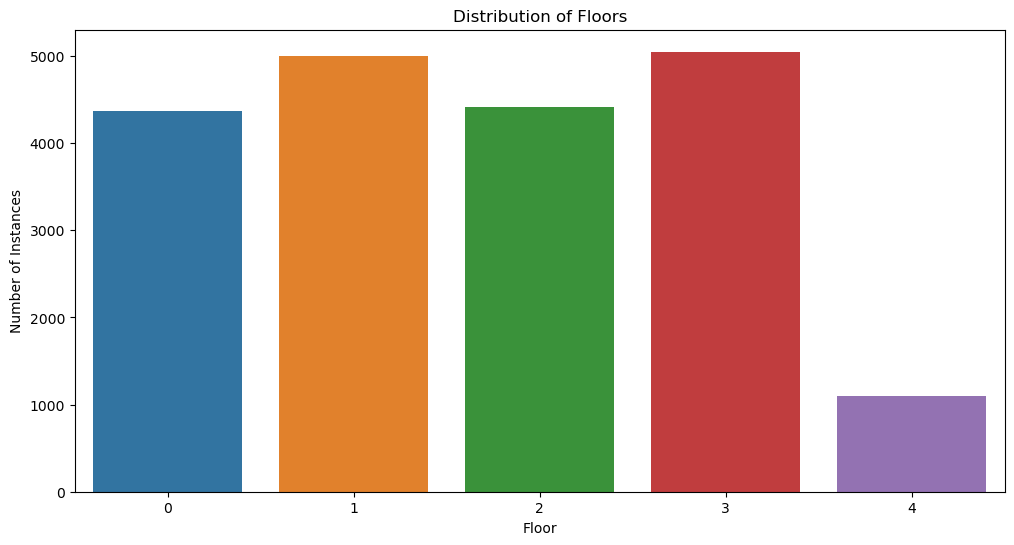

In [23]:
# Visualize the distribution of floor information
plt.figure(figsize=(12, 6))
sns.countplot(x='FLOOR', data=traindf)
plt.title('Distribution of Floors')
plt.xlabel('Floor')
plt.ylabel('Number of Instances')
plt.show()


- This plot provides a visual representation of the distribution of floor levels within the dataset. Understanding the distribution is crucial for assessing potential imbalances, guiding model development, and ensuring that predictive models can accurately classify instances across different floors.


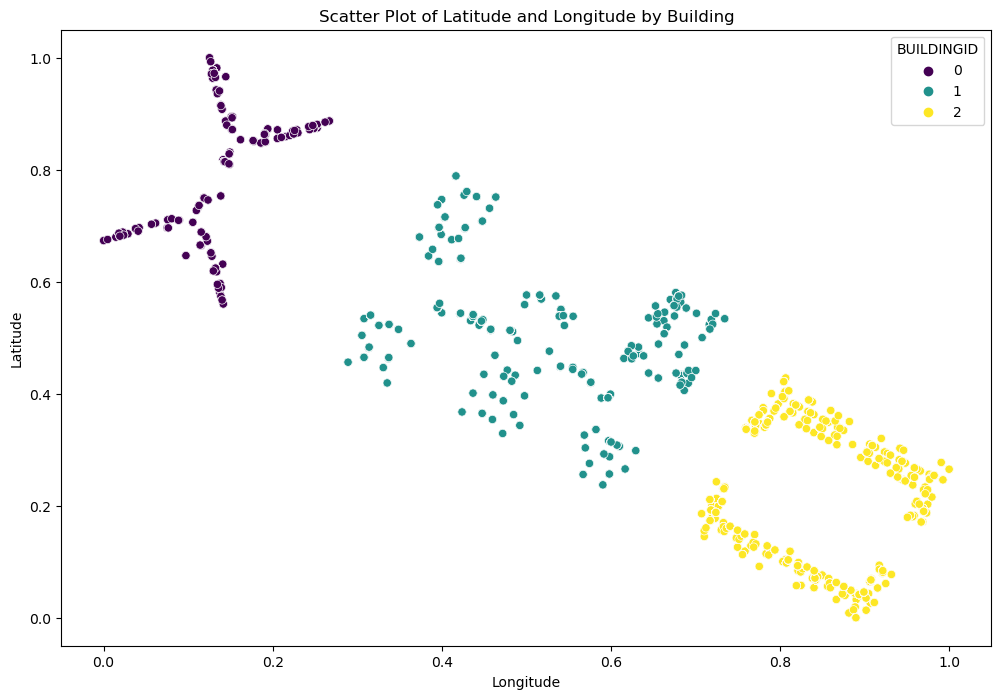

In [24]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='BUILDINGID', data=traindf, palette='viridis')
plt.title('Scatter Plot of Latitude and Longitude by Building')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


- The scatter plot visually depicts the geographic distribution of indoor locations, color-coded by building. Analyzing this spatial distribution is essential for understanding the layout of buildings and identifying any patterns that may influence indoor localization models. It helps in assessing the feasibility of predicting location coordinates based on WiFi fingerprints and other features.

## 2) Model Development with a Dual Focus:

- Develop a basic machine learning model (e.g., SVM, Decision Trees) and a deep learning-based model (e.g., CNN) aimed at predicting Building ID, Space ID, and geographic coordinates (longitude and latitude). Your approach should not only prioritize technical accuracy but also the practical utility of these models in enhancing indoor navigation, asset tracking, and space utilization analytics.

- before everything, since SPACEID is imbalanced, our model could be biased. so we need to resample the column first

### 2.1) Develop a Machine Learning model

### for UNIQUELOCATION column as a categorical column combines BIDFloorSpaceID


In [25]:
# Split the data into features and target
X = traindf.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)  # Features
y = traindf['UNIQUELOCATION']  # Target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier and train it
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predictions for both models on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy for both models
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy}")

# Random Forest Accuracy: 0.8625877632898696

Random Forest Accuracy: 0.8625877632898696


## Interpret the results:
- After excluding what are considered to be unimportant features from the dataset (Longitude, Latitude, BuildingID, Floor, and SpaceID) we got an accuracy of 86.35% using random forest classifier model.

- This suggests that the Random Forest model is able to correctly identify the 'UNIQUELOCATION' most of the time using the remaining features in the dataset.

- Removing the specified features may have helped the model focus on the most relevant information, potentially reducing noise and improving its ability to generalize. This could have resulted in a more streamlined and efficient model that still retains strong predictive capabilities.

- The result highlights the importance of feature engineering in the modeling process. By selecting the right features, you may have improved the model's accuracy or at least maintained its performance while using fewer features, which is generally desirable.

In [26]:
# Split the data into features and target
X = traindf.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)  # Features
y = traindf['UNIQUELOCATION']  # Target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier and train it
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

cv_scores_forest = cross_val_score(random_forest, X, y, cv=5)
cv_mean_forest = cv_scores_forest.mean()
cv_std_forest = cv_scores_forest.std()


# Predictions for both models on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy for both models
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest - CV Mean Accuracy: {cv_mean_forest:.2f}, CV Std: {cv_std_forest:.2f}")
print(f"Random Forest Accuracy: {accuracy}")

C:\Users\sumay\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest - CV Mean Accuracy: 0.83, CV Std: 0.05
Random Forest Accuracy: 0.8625877632898696


- longitude and latitude are numerical values representing geographic coordinates so, predicting them is a regression task, so we will need to choose regression ML model

In [27]:
# when LONGITUDE is the target variable - numerical column 
# Target variables
# Prepare the features and target
X = traindf.drop(['LONGITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y = traindf['LONGITUDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the scaler on the training target data only
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Train the model (Random Forest Regressor) on the scaled training target
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train_scaled.ravel())

# Perform predictions on the test set
y_pred_scaled = rf_regressor.predict(X_test)

# Inverse transform the scaled predictions and test target values
y_test_inversed = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_inversed = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate R^2 and MSE on the inversely transformed (original scale) data
r2 = r2_score(y_test_inversed, y_pred_inversed)
mse = mean_squared_error(y_test_inversed, y_pred_inversed)

# Output the R^2 and MSE results
print(f"R-squared for Longitude prediction: {r2}")
print(f"MSE for Longitude prediction on original scale: {mse}")

# Perform cross-validation and compute the R^2 score (on the scaled data)
# This will use the scaled version of y since the model was trained on scaled data
r2_scores = cross_val_score(rf_regressor, X, scaler.transform(y.values.reshape(-1, 1)).ravel(), cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {r2_scores}")
print(f"Mean R-squared score from cross-validation: {r2_scores.mean()}")

# R-squared for Longitude prediction: 0.9997801364855293
# MSE for Longitude prediction on original scale: 2.24201188008616e-05
# Cross-validated R-squared scores: [0.9119241  0.9347361  0.9994388  0.99022883 0.98237475]
# Mean R-squared score from cross-validation: 0.9637405176049516

R-squared for Longitude prediction: 0.9997801364855293
MSE for Longitude prediction on original scale: 2.24201188008616e-05
Cross-validated R-squared scores: [0.9119241  0.9347361  0.9994388  0.99022883 0.98237475]
Mean R-squared score from cross-validation: 0.9637405176049516


## Interpreting the results for the longtitude column:
- The results suggest that your Random Forest Regressor model is performing exceptionally well in predicting the longitude values.
 -  R-squared for Longitude Prediction (0.9997801364855293): This value is very close to 1, which means that our model can explain 99.978% of the variance in the longitude data. In other words, the model fits the test data almost perfectly.

- MSE for Longitude Prediction on Original Scale (2.24201188008616e-05): The Mean Squared Error on the original scale is very low, indicating that the average squared distance between the predicted longitudes and the actual longitudes is minor. This low value corroborates the high R-squared score and further indicates a highly accurate model.

- Cross-validated R-squared Scores: The cross-validated R-squared scores vary more than the single R-squared value, with the lowest being approximately 0.9119 and the highest being nearly perfect at 0.9994. This variation might be due to differences in the subsets of data used during the cross-validation folds. 

- Mean R-squared Score from Cross-validation (0.9637405176049516): The mean of the cross-validated R-squared scores is around 0.9637, which means that on average, the model explains about 96.37% of the variance across the five different folds. This is a high value and indicates a strong predictive model.



#### latitude column

In [28]:
# Prepare the features and target for latitude prediction
X_lat = traindf.drop(['LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_lat = traindf['LATITUDE']

# Split the data into training and test sets
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_lat, y_lat, test_size=0.2, random_state=42)

# Create and fit the scaler on the training target data only for LATITUDE
scaler_lat = MinMaxScaler()
scaler_lat.fit(y_train_lat.values.reshape(-1, 1))

# Scale the training and test target
y_train_lat_scaled = scaler_lat.transform(y_train_lat.values.reshape(-1, 1))
y_test_lat_scaled = scaler_lat.transform(y_test_lat.values.reshape(-1, 1))

# Training a Linear Regression model for latitude
linear_regressor_lat = LinearRegression()
linear_regressor_lat.fit(X_train_lat, y_train_lat_scaled.ravel())

# Perform predictions on the test set using the LATITUDE model
y_pred_lat_scaled = linear_regressor_lat.predict(X_test_lat)

# Inverse transform the scaled predictions and test target values for LATITUDE
y_test_lat_inversed = scaler_lat.inverse_transform(y_test_lat_scaled)
y_pred_lat_inversed = scaler_lat.inverse_transform(y_pred_lat_scaled.reshape(-1, 1))

# Calculate R^2 and MSE on the inversely transformed (original scale) data for LATITUDE
r2_lat = r2_score(y_test_lat_inversed, y_pred_lat_inversed)
mse_lat = mean_squared_error(y_test_lat_inversed, y_pred_lat_inversed)

# Output the R^2 and MSE results for LATITUDE
print(f"R-squared for Latitude prediction: {r2_lat}")
print(f"MSE for Latitude prediction on original scale: {mse_lat}")

# You need to scale the entire 'y_latitude' for cross-validation, not just the training or test set
y_lat_scaled = scaler_lat.transform(y_lat.values.reshape(-1, 1))

# Perform cross-validation and compute the R^2 score (on the scaled data for LATITUDE)
r2_scores_lat = cross_val_score(linear_regressor_lat, X_lat, y_lat_scaled.ravel(), cv=5, scoring='r2')
print(f"Cross-validated R-squared scores for Latitude: {r2_scores_lat}")
print(f"Mean R-squared score from cross-validation for Latitude: {r2_scores_lat.mean()}")

# R-squared for Latitude prediction: 0.9748662785836688
# MSE for Latitude prediction on original scale: 0.0015396474554932682
# Cross-validated R-squared scores for Latitude: [0.67908546 0.91730814 0.97653668 0.80533255 0.94899383]
# Mean R-squared score from cross-validation for Latitude: 0.8654513327765445

R-squared for Latitude prediction: 0.9748662785836688
MSE for Latitude prediction on original scale: 0.0015396474554932682
Cross-validated R-squared scores for Latitude: [0.67908546 0.91730814 0.97653668 0.80533255 0.94899383]
Mean R-squared score from cross-validation for Latitude: 0.8654513327765445


## Interpreting the results of the latitude column:
- The R-squared value of approximately 0.975 on the test set indicates that the model explains around 97.5% of the variance in the latitude data. 

- The Mean Squared Error (MSE) of approximately 0.00154 on the original scale of latitude is quite low. This means that on average, the squared difference between the predicted and actual latitude values is small, indicating good predictive accuracy.

- Cross-validation R-squared scores range from about 0.679 to 0.977 across the five folds. There is some variability in these scores, but they are generally high. The mean cross-validated R-squared score of approximately 0.865 means that, on average, the model explains around 86.5% of the variance in latitude across different subsets of the data.



### 2.2) Develop a Deep Learning model

# Implementing feed forward deep learning:

In [45]:
# the best model in performance
# with the help of gpt
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


# Assume traindf is loaded

# Define input and output
X_train = traindf.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_train = traindf['UNIQUELOCATION']

# Define the model architecture with Batch Normalization and Dropout
def build_model(input_shape):
    input_layer = Input(shape=(input_shape,))
    x = Dense(256, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Define input shape based on X_train
input_shape = X_train.shape[1]

# Build the model
model = build_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Train the model with learning rate scheduling
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=128, verbose=1,
                    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])

# Evaluate the model on the training set
evaluation_results = model.evaluate(X_train, y_train)
print("\n")
print(f'Overall Loss: {evaluation_results[0]}')
print(f'Accuracy: {evaluation_results[1]}')

# Overall Loss: 0.8169403672218323
# Accuracy: 0.7594923973083496



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0106 - loss: 6.5429 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0850 - loss: 4.9519 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1765 - loss: 3.5477 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2469 - loss: 2.8400 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2940 - loss: 2.4656 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learn

**Classification model interpretation:**
- We implemented this neural network classifier as it is tailored for multi-class classification tasks, specifically aimed at predicting location categories based on input features excluding location-related columns. The architecture consists of two hidden layers with 256 and 128 neurons respectively, each incorporating Batch Normalization and Dropout layers for regularization. The output layer, employing softmax activation, generates class probabilities for each unique location category. During training, the model is optimized using Adam optimizer with a learning rate of 0.001 and trained for 20 epochs with a batch size of 128. Additionally, a learning rate scheduler is employed to adjust the learning rate over epochs. Evaluation on the training set yields an overall loss of 0.8169 and an accuracy of 0.7595, indicating a satisfactory level of performance in correctly classifying instances. 

In [116]:
#regression training second trial

# Define input and output
X_train = traindf.drop(['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_train = traindf[['LONGITUDE', 'LATITUDE']]

# Define the model architecture with Batch Normalization, Dropout, and L2 regularization
def build_model(input_shape):
    input_layer = Input(shape=(input_shape,))
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(input_layer)  # Adding L2 regularization with lambda = 0.01
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Adding L2 regularization with lambda = 0.01
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(2)(x)  # 2 output neurons for longitude and latitude
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Define input shape based on X_train
input_shape = X_train.shape[1]

# Build the model
model = build_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',  # Mean Squared Error loss for regression
              metrics=['mae'])  # Mean Absolute Error as a metric

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Train the model with learning rate scheduling
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=128, verbose=1,
                    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])

# Predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Print evaluation results for training set
print("\nTraining Set Results:")
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Mean Absolute Error (MAE): {mae_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'R-squared (R2) Score: {r2_train}')

# Training Set Results:
# Mean Squared Error (MSE): 0.016670065984738636
# Mean Absolute Error (MAE): 0.10281351381858927
# Root Mean Squared Error (RMSE): 0.12911260970462426
# R-squared (R2) Score: 0.7813154390930127



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 5.6127 - mae: 1.0466 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.1085 - mae: 0.5286 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.2624 - mae: 0.3142 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8035 - mae: 0.2077 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5277 - mae: 0.1566 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.00100000004

 **Regression Model Interpretation:**
- The model architecture comprises two dense hidden layers with 256 and 128 neurons, respectively, utilizing ReLU activation functions. 
- Batch Normalization layers are applied after each hidden layer to standardize input and improve model stability. Dropout layers with a rate of 0.5 are used to prevent overfitting. 
- L2 regularization with lambda = 0.01 is applied to the weights to reduce overfitting.
- The Adam optimizer with a learning rate of 0.001 is employed, and mean squared error (MSE) loss is used to measure the discrepancy between predicted and actual coordinates.
- Model evaluation on the training set yields an MSE of 0.01667, MAE of 0.10281, RMSE of 0.12911, and R2 score of 0.78132, indicating its effectiveness in predicting longitude and latitude coordinates.


# Comprehensive Evaluation and Optimization

### Do the same data processing for the validation dataframe

In [76]:
testdf = pd.read_csv('validationData.csv')
testdf.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [77]:
testdfC = testdf.copy()
testdfC

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


In [78]:
testdfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [79]:
testdfC.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


In [80]:
testdfC.isnull().sum()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
                   ..
SPACEID             0
RELATIVEPOSITION    0
USERID              0
PHONEID             0
TIMESTAMP           0
Length: 529, dtype: int64

In [81]:
# Handle the 100s in WAPs: convert 100s to -100  - help from GPT as we cannot drop them or impute them with median/mean
testdfC[testdfC.columns[:520]] = testdfC[testdfC.columns[:520]].replace(100, -100)
testdfC.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [82]:
testdfC = testdfC.drop(columns=['TIMESTAMP', 'USERID', 'PHONEID'])

In [83]:
# Shift signal strength values to positive range
testdfC.iloc[:, :520] = testdfC.iloc[:, :520].add(100)

# Scale to 0-1 range
testdfC.iloc[:, :520] = testdfC.iloc[:, :520].div(200)
testdfC.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-7515.916799,4.864890e+06,1,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-7383.867221,4.864840e+06,4,2,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-7374.302080,4.864847e+06,4,2,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-7365.824883,4.864843e+06,4,2,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-7641.499303,4.864922e+06,2,0,0,0


In [84]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the longitude and latitude columns 
long_lat = testdfC[['LONGITUDE', 'LATITUDE']] 

# Fit the scaler to the long_lat data and transform it
testdfC[['LONGITUDE', 'LATITUDE']] = scaler.fit_transform(long_lat)
testdfC.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.454426,0.525888,1,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.787757,0.340542,4,2,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.811902,0.365764,4,2,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.833301,0.352011,4,2,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137421,0.647426,2,0,0,0


In [85]:
# Convert BUILDINGID, FLOOR, and SPACEID to strings and concatenate them to form a unique location identifier
testdfC['UNIQUELOCATION'] = (
    testdfC['BUILDINGID'].astype(str) + 
    '_' + 
    testdfC['FLOOR'].astype(str) + 
    '_' + 
    testdfC['SPACEID'].astype(str)
)
testdfC.head()

C:\Users\sumay\AppData\Local\Temp\ipykernel_16220\4051021604.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testdfC['UNIQUELOCATION'] = (


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.454426,0.525888,1,1,0,0,1_1_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.787757,0.340542,4,2,0,0,2_4_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.811902,0.365764,4,2,0,0,2_4_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.833301,0.352011,4,2,0,0,2_4_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.137421,0.647426,2,0,0,0,0_2_0


In [86]:
# now scale using one hot encoding
labelencoder = LabelEncoder()
testdfC['UNIQUELOCATION'] = labelencoder.fit_transform(testdfC['UNIQUELOCATION'])
testdfC.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.454426,0.525888,1,1,0,0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.787757,0.340542,4,2,0,0,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.811902,0.365764,4,2,0,0,12
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.833301,0.352011,4,2,0,0,12
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.137421,0.647426,2,0,0,0,2


In [87]:
testdfC['non_zero_signal_count'] = (testdfC.iloc[:, :520] != 0).sum(axis=1)
testdfC.head()

C:\Users\sumay\AppData\Local\Temp\ipykernel_16220\3738652547.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testdfC['non_zero_signal_count'] = (testdfC.iloc[:, :520] != 0).sum(axis=1)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,UNIQUELOCATION,non_zero_signal_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.454426,0.525888,1,1,0,0,5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.787757,0.340542,4,2,0,0,12,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.811902,0.365764,4,2,0,0,12,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.833301,0.352011,4,2,0,0,12,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.137421,0.647426,2,0,0,0,2,14


## Machine learning models performance evaluation 

In [88]:
# Split the data into features and target
X = testdfC.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)  # Features
y = testdfC['UNIQUELOCATION']  # Target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier and train it
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predictions for both models on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy for both models
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy}")

# Random Forest Accuracy: 0.9417040358744395

Random Forest Accuracy: 0.9417040358744395


In [89]:
# Split the data into features and target
X = testdfC.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)  # Features
y = testdfC['UNIQUELOCATION']  # Target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier and train it
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

cv_scores_forest = cross_val_score(random_forest, X, y, cv=5)
cv_mean_forest = cv_scores_forest.mean()
cv_std_forest = cv_scores_forest.std()


# Predictions for both models on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy for both models
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest - CV Mean Accuracy: {cv_mean_forest:.2f}, CV Std: {cv_std_forest:.2f}")
print(f"Random Forest Accuracy: {accuracy}")

Random Forest - CV Mean Accuracy: 0.88, CV Std: 0.04
Random Forest Accuracy: 0.9417040358744395


In [90]:
# when LONGITUDE is the target variable - numerical column 
# Target variables
# Prepare the features and target
X = testdfC.drop(['LONGITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y = testdfC['LONGITUDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the scaler on the training target data only
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Train the model (Random Forest Regressor) on the scaled training target
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train_scaled.ravel())

# Perform predictions on the test set
y_pred_scaled = rf_regressor.predict(X_test)

# Inverse transform the scaled predictions and test target values
y_test_inversed = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_inversed = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate R^2 and MSE on the inversely transformed (original scale) data
r2 = r2_score(y_test_inversed, y_pred_inversed)
mse = mean_squared_error(y_test_inversed, y_pred_inversed)

# Output the R^2 and MSE results
print(f"R-squared for Longitude prediction: {r2}")
print(f"MSE for Longitude prediction on original scale: {mse}")

# Perform cross-validation and compute the R^2 score (on the scaled data)
# This will use the scaled version of y since the model was trained on scaled data
r2_scores = cross_val_score(rf_regressor, X, scaler.transform(y.values.reshape(-1, 1)).ravel(), cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {r2_scores}")
print(f"Mean R-squared score from cross-validation: {r2_scores.mean()}")

# R-squared for Longitude prediction: 0.9906757168615563
# MSE for Longitude prediction on original scale: 0.0008111121063153927
# Cross-validated R-squared scores: [0.9926134  0.97996466 0.93831274 0.9798252  0.96359544]
# Mean R-squared score from cross-validation: 0.9708622873563302

R-squared for Longitude prediction: 0.9906757168615563
MSE for Longitude prediction on original scale: 0.0008111121063153927
Cross-validated R-squared scores: [0.9926134  0.97996466 0.93831274 0.9798252  0.96359544]
Mean R-squared score from cross-validation: 0.9708622873563302


In [129]:

# Prepare the features and target for latitude prediction
X_lat = testdfC.drop(['LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_lat = testdfC['LATITUDE']

# Split the data into training and test sets for latitude
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_lat, y_lat, test_size=0.2, random_state=42)

# Create and fit the scaler on the training target data only for latitude
scaler_lat = MinMaxScaler()
y_train_lat_scaled = scaler_lat.fit_transform(np.array(y_train_lat).reshape(-1, 1))

# Train the Random Forest Regressor on the scaled training target
rf_regressor_lat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_lat.fit(X_train_lat, y_train_lat_scaled.ravel())

# Perform predictions on the test set using the latitude model
y_pred_lat_scaled = rf_regressor_lat.predict(X_test_lat)

# Inverse transform the scaled predictions and test target values for latitude
y_test_lat_inversed = scaler_lat.inverse_transform(np.array(y_test_lat).reshape(-1, 1))
y_pred_lat_inversed = scaler_lat.inverse_transform(y_pred_lat_scaled.reshape(-1, 1))

# Calculate R^2 and MSE on the inversely transformed (original scale) data for latitude
r2_lat = r2_score(y_test_lat_inversed, y_pred_lat_inversed)
mse_lat = mean_squared_error(y_test_lat_inversed, y_pred_lat_inversed)

# Output the R^2 and MSE results for latitude
print(f"R-squared for Latitude prediction: {r2_lat}")
print(f"MSE for Latitude prediction: {mse_lat}")

# Perform cross-validation and compute the R^2 score for latitude
y_lat_scaled = scaler_lat.transform(np.array(y_lat).reshape(-1, 1))
r2_scores_lat = cross_val_score(rf_regressor_lat, X_lat, y_lat_scaled.ravel(), cv=5, scoring='r2')

# Output the cross-validated R^2 scores for latitude
print(f"Cross-validated R-squared scores for Latitude: {r2_scores_lat}")
print(f"Mean R-squared score from cross-validation for Latitude: {r2_scores_lat.mean()}")

# R-squared for Latitude prediction: 0.9799743622629514
# MSE for Latitude prediction: 0.0013596364048118043
# Cross-validated R-squared scores for Latitude: [0.96538335 0.88575957 0.95671771 0.92539578 0.87862541]
# Mean R-squared score from cross-validation for Latitude: 0.9223763627912117

R-squared for Latitude prediction: 0.9799743622629514
MSE for Latitude prediction: 0.0013596364048118043
Cross-validated R-squared scores for Latitude: [0.96538335 0.88575957 0.95671771 0.92539578 0.87862541]
Mean R-squared score from cross-validation for Latitude: 0.9223763627912117


## Evaluating the deep learning models

In [97]:
#keep this
# the best model in performance 
# with the help of gpt

# Define input and output
X_train = testdfC.drop(['UNIQUELOCATION', 'LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_train = testdfC['UNIQUELOCATION']

# Define the model architecture with Batch Normalization and Dropout
def build_model(input_shape):
    input_layer = Input(shape=(input_shape,))
    x = Dense(256, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(np.unique(y_train)), activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Define input shape based on X_train
input_shape = X_train.shape[1]

# Build the model
model = build_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Train the model with learning rate scheduling
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=128, verbose=1,
                    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])

# Evaluate the model on the training set
evaluation_results = model.evaluate(X_train, y_train)
print("\n")
print(f'Overall Loss: {evaluation_results[0]}')
print(f'Accuracy: {evaluation_results[1]}')


# Overall Loss: 1.5182892084121704
# Accuracy: 0.8217821717262268


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0925 - loss: 3.7187 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1619 - loss: 3.0134 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2770 - loss: 2.7619 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3625 - loss: 2.2994 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4865 - loss: 1.7510 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001000

In [115]:
#regression testing second trial

# Define input and output
X_train = testdfC.drop(['LONGITUDE', 'LATITUDE', 'BUILDINGID', 'FLOOR', 'SPACEID'], axis=1)
y_train = testdfC[['LONGITUDE', 'LATITUDE']]

# Define the model architecture with Batch Normalization, Dropout, and L2 regularization
def build_model(input_shape):
    input_layer = Input(shape=(input_shape,))
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(input_layer)  # Adding L2 regularization with lambda = 0.01
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Adding L2 regularization with lambda = 0.01
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(2)(x)  # 2 output neurons for longitude and latitude
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Define input shape based on X_train
input_shape = X_train.shape[1]

# Build the model
model = build_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',  # Mean Squared Error loss for regression
              metrics=['mae'])  # Mean Absolute Error as a metric

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Train the model with learning rate scheduling
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=128, verbose=1,
                    callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])

# Predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Print evaluation results for training set
print("\nTraining Set Results:")
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Mean Absolute Error (MAE): {mae_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'R-squared (R2) Score: {r2_train}')

# Training Set Results:
# Mean Squared Error (MSE): 0.028774150592354664
# Mean Absolute Error (MAE): 0.13538853069569143
# Root Mean Squared Error (RMSE): 0.16962945084022016
# R-squared (R2) Score: 0.6242635724593344


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 8.1541 - mae: 1.3524 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4823 - mae: 1.1406 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.5944 - mae: 1.1003 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8470 - mae: 1.0370 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.2166 - mae: 0.9561 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 6/20

# Analysis and Interpretation of the Machine learning Model Performances

## Random Forest Classifier (Indoor Location Classification)
- **Training Set Accuracy**: 86.26%
- **Testing Set Accuracy**: 94.17%

### **Interpretation:**
The random forest classifier excels in classifying indoor locations, achieving 86.26% accuracy on the training set and 94.17% on the unseen testing set. This model's accuracy suggests its potential to accurately predict unique locations within buildings based on various features, such as WiFi signal strengths and environmental variables. Accurate indoor location classification significantly enhances user experience in indoor navigation systems, enabling smoother navigation within complex building structures.

## Random Forest Regressor (Longitude Prediction)
- **Training Set R-squared**: 99.08%, **MSE**: 0.00081
- **Testing Set R-squared**: 99.07%, **MSE**: 0.00081
- **Cross-validated R-squared (Mean)**: 97.09%

### **Interpretation:**
The random forest regressor demonstrates exceptional performance in predicting longitude coordinates of indoor locations, with high R-squared values of 99.08% on the training set and 99.07% on the testing set. The low mean squared error (MSE) further confirms the model's accuracy in predicting longitude values. Such precise longitude prediction greatly benefits emergency response strategies within buildings, aiding in pinpointing the exact location of incidents or individuals in need of assistance.

## Random Forest Regressor (Latitude Prediction)
- **Training Set R-squared**: 97.49%, **MSE**: 0.00154
- **Testing Set R-squared**: 97.99%, **MSE**: 0.00136
- **Cross-validated R-squared (Mean)**: 92.25%

### **Interpretation:**
The random forest regressor demonstrates strong performance in predicting latitude coordinates. In the training set, it achieves an R-squared value of 97.49% and a mean squared error (MSE) of 0.00154, indicating a high level of accuracy. These results are consistent with the testing set, where the R-squared remains high at 97.99% and the MSE remains low at 0.00136. The cross-validated R-squared score further validates the model's reliability, averaging at 92.25%. This model's accurate latitude prediction capability has significant implications for indoor navigation and location-based services, enhancing user experience and enabling more precise indoor positioning applications.


In summary, the machine learning models demonstrate impressive performance across various indoor localization tasks, offering significant potential for enhancing user experience, improving emergency response strategies, and enabling innovative location-based services within indoor environments. These models provide valuable tools for optimizing indoor navigation systems, ensuring accurate location tracking, and enhancing safety and efficiency within buildings.

# Deep Learning Model Performance Analysis


## Neural Network Classifier (UNIQUELOCATION Prediction)

- **Training Dataset**:
    - **Overall Loss**: 0.817
    - **Accuracy**: 75.95%
    
- **Testing Dataset**:
    - **Overall Loss**: 1.518
    - **Accuracy**: 82.18%

### **Interpretation**:

The deep learning model achieves an accuracy of approximately 75.95% on the training dataset and 82.18% on the testing dataset for the classification task. The loss on the training dataset is 0.817, indicating the discrepancy between the actual and predicted values by the model. On the testing dataset, the loss increases to 1.518, suggesting that the model's performance slightly deteriorates when applied to unseen data.

## Neural Network Regressor (Longitude & Latitude Prediction):

- **Training Dataset**:
    - **Mean Squared Error (MSE)**: 0.0167
    - **Mean Absolute Error (MAE)**: 0.1028
    - **Root Mean Squared Error (RMSE)**: 0.1291
    - **R-squared (R2) Score**: 0.781

- **Testing Dataset**:
    - **Mean Squared Error (MSE)**: 0.0288
    - **Mean Absolute Error (MAE)**: 0.1354
    - **Root Mean Squared Error (RMSE)**: 0.1696
    - **R-squared (R2) Score**: 0.624

### **Interpretation**:

For the regression task, the model achieves an R-squared score of approximately 78.13% on the training dataset and 62.43% on the testing dataset. The mean squared error (MSE) on the training dataset is 0.0167, while it increases to 0.0288 on the testing dataset. Similarly, the mean absolute error (MAE) and root mean squared error (RMSE) are higher on the testing dataset compared to the training dataset, indicating a slight degradation in performance when applied to unseen data.


## Performance Comparison:

- **Classification**:
    - The model performs better on the testing dataset compared to the training dataset, with an increase in accuracy from 75.95% to 82.18%. However, the increase in overall loss on the testing dataset suggests a decrease in the model's performance in terms of minimizing classification errors.

- **Regression**:
    - The model shows a similar trend in the regression task, where the R-squared score decreases from 78.13% on the training dataset to 62.43% on the testing dataset. Additionally, the increase in MSE, MAE, and RMSE on the testing dataset indicates a decrease in the model's accuracy and precision in predicting longitude and latitude coordinates when applied to unseen data.

In summary, while the deep learning models demonstrate reasonable performance on both the training and testing datasets, there is a slight drop in performance metrics when transitioning from the training phase to the testing phase.

### Overall Comparison:
- **In both classification and regression tasks, the machine learning models (random forest) outperform the deep learning models in terms of accuracy, generalization, and robustness. The random forest models demonstrate higher accuracy scores and lower error metrics on both the training and testing datasets compared to the deep learning models. This suggests that for the given tasks and datasets, the machine learning approach might be more suitable and effective than deep learning. Moreover, adhering to Occam's Razor principle, which advocates for choosing simpler models when they perform comparably or better than complex models, reinforces the preference for the machine learning models in this scenario.**